In [8]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
train_df = pd.read_csv(r'C:\Users\Vaibhav\Desktop\BA\Datasets\titanic_train.csv') #using which we are going to train the ml model
#once the model has been trained and performance is guaranteed, we are going to implement the model on future data

#future data - which does not have survived values; we need to predict whether the passenger will survive or not based on the model
unknown_df = pd.read_csv('C:/Users/Vaibhav/Desktop/BA/Datasets/titanic_test.csv')
#We can make the prediction of Survival only if this dataset is also clean (like training dataset) and has the same columns as 
#training data-set. Otherwise we can't implement the model.

In [2]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
unknown_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
unknown_df['Survived'] = -888

In [6]:
unknown_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-888
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-888
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-888


In [7]:
train_df.shape, unknown_df.shape

((891, 12), (420, 12))

In [9]:
df = pd.concat((train_df, unknown_df), axis = 0)

In [10]:
df.shape

(1311, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1048 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1310 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [13]:
df.isnull().sum()

Age             263
Cabin          1016
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

### delete the null values

In [ ]:
titanic_nona = df.dropna(how = "any") #any row having missing value delete it

In [ ]:
#titanic_nona = df.dropna(how = "all") #only if all the columns in the row are missing then delete it
#this is for deletion of emptyrows

In [ ]:
#thresh = 2 - the rows that are deleted are only those which have missing values >=2 . If the number of missing values in a row is only 1, then that row is not deleted, we can impute that missing value.

In [ ]:
#threshold = 4  - if there are rows which are having 4 missing values then delete those rows

In [ ]:
#subset - you can specify the columns in which the missing values have to be looked for. And if there are missing values there, then delete those rows

### impute the na values

#### using the loc fn

In [15]:
df.Age.isnull().sum()

263

In [18]:
mean_Age = df.Age.mean()
median_Age = df.Age.median()
print(mean_Age, median_Age)

29.901879770992366 28.0


In [21]:
df.loc[df.Age.isnull(), "Age"] = median_Age

In [22]:
df.Age.isnull().sum()

0

In [24]:
df.Embarked.isnull().sum()

2

In [27]:
df.Embarked = df.Embarked.astype("category")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1311 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null category
Fare           1310 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 124.3+ KB


In [29]:
df.Embarked.value_counts()

S    915
C    270
Q    124
Name: Embarked, dtype: int64

In [ ]:
#imputation with the value having the highest freq

In [32]:
df.loc[df.Embarked.isnull(), "Embarked"] = "S"

In [34]:
df.Embarked.isnull().sum()

0

#### fill na

In [35]:
df = pd.concat((train_df, unknown_df), axis = 0)

In [36]:
df["Age"].fillna(median_Age,inplace = True)

In [38]:
df["Embarked"].fillna("S", inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1311 non-null float64
Cabin          295 non-null object
Embarked       1311 non-null object
Fare           1310 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


#### imputer class

In [40]:
df = pd.concat((train_df, unknown_df), axis = 0)

In [47]:
from sklearn.preprocessing import Imputer 
#works only for numerical

In [42]:
imp = Imputer(strategy="mean")

In [43]:
type(imp)

sklearn.preprocessing.imputation.Imputer

In [44]:
imp.fit(df[["Fare", "Age"]]) #this will calculate the mean values for all the columns in the dataframe

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [45]:
df[["Fare", "Age"]]=imp.transform(df[["Fare", "Age"]])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1311 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1311 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [67]:
df = pd.concat((train_df, unknown_df), axis = 0)

In [68]:
df[["Age", "Fare"]]=imp.fit_transform(df[["Age", "Fare"]])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 419
Data columns (total 12 columns):
Age            1048 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1310 non-null float64
Name           1311 non-null object
Parch          1311 non-null int64
PassengerId    1311 non-null int64
Pclass         1311 non-null int64
Sex            1311 non-null object
SibSp          1311 non-null int64
Survived       1311 non-null int64
Ticket         1311 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 133.1+ KB


In [70]:
#to use imputer class for embarked 

In [71]:
df.Embarked = df.Embarked.astype("category")

In [72]:
df.Embarked=df.Embarked.cat.codes

In [73]:
imp = Imputer(missing_values = -1, strategy="most_frequent")

In [75]:
df[["Embarked"]]=imp.fit_transform(df[["Embarked"]]) #dataframe needs to be given

In [63]:
df.Embarked.value_counts()

2.0    917
0.0    270
1.0    124
Name: Embarked, dtype: int64

In [64]:
df.Embarked=df.Embarked.replace({0.0: "C", 1: "Q", 2.0: "S"})

df.Embarked

#### transform

In [94]:
df = pd.concat((train_df, unknown_df), axis = 0)

In [ ]:
df.transform()

In [89]:
seq = df.groupby("Sex").Fare.transform("median")
seq.head()

0    11.5
1    23.0
2    23.0
3    23.0
4    11.5
Name: Fare, dtype: float64

In [91]:
import numpy as np
df["Fare"] = np.where(df.Fare.notnull(), df.Fare, seq)

In [95]:
df[df.Fare.isnull()]["Fare"] = np.where(df[df.Fare.isnull()].Sex == "male", 11.5, 23)

In [96]:
df.groupby("Embarked").Age.mean()

Embarked
C    32.332170
Q    28.745098
S    29.267880
Name: Age, dtype: float64

----

### Feature Engineering

In [97]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [99]:
df.Name[0]

0    Braund, Mr. Owen Harris
0           Kelly, Mr. James
Name: Name, dtype: object

In [100]:
df.reset_index(inplace=True)

In [104]:
name = df.Name[0]
name

'Braund, Mr. Owen Harris'

In [109]:
name.split()[1].split(".")[0].lower()

'mr'

In [149]:
name = df.Name[18]

In [156]:
name.split(",")[1].split(".")[0][1:].lower()

'mrs'

In [157]:
df.Title=df.Name.apply(lambda name: name.split(",")[1].split(".")[0][1:].lower())

In [158]:
df["Title_2nd"]=df["Name"].str.extract("([A-Za-z]+)\.")

In [159]:
df["Title_2nd"] = df["Title_2nd"].str.lower()

In [160]:
df.Title.value_counts()

mr              758
miss            260
mrs             198
master           61
rev               8
dr                8
col               4
ms                2
major             2
mlle              2
sir               1
dona              1
mme               1
capt              1
the countess      1
jonkheer          1
don               1
lady              1
Name: Name, dtype: int64

In [161]:
def extract_title (name):
    
    title = name.split(",")[1].split(".")[0][1:].lower()
    
    title_group = { 'mr' : 'Mr',
           'mrs' : 'Mrs',
           'miss':'Miss',
           'master': 'Master',
           'don': 'Sir',
           'rev': 'Sir',
           'dr': 'Officer',
           'mme': 'Mrs',
           'ms': 'Mrs',
           'major': 'Officer',
           'lady': 'Lady',
           'sir': 'Sir',
           'mlle': 'Miss',
           'col': 'Officer',
           'capt': 'Officer',
           'the countess': 'Lady',
           'jonkheer': 'Sir',
           'dona': 'Lady'}
    
    return title_group[title]

In [162]:
name

'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'

In [163]:
extract_title(name)

'Mrs'

In [165]:
df["Title"] = df.Name.apply(extract_title)

In [166]:
df.Title.value_counts()

mr              758
miss            260
mrs             198
master           61
rev               8
dr                8
col               4
ms                2
major             2
mlle              2
sir               1
dona              1
mme               1
capt              1
the countess      1
jonkheer          1
don               1
lady              1
Name: Name, dtype: int64

In [174]:
seq = df.groupby("Title").Age.transform("mean")
seq.value_counts() #sequence of average ages for each title

32.256014    758
21.795236    262
36.924855    201
5.482642      61
49.142857     15
41.545455     11
40.000000      3
Name: Age, dtype: int64

In [172]:
df["Age"]=np.where(df.Age.isnull(), seq, df.Age)

In [175]:
df.drop("Title_2nd", axis = 1,inplace=True)

#### FamilySize

In [176]:
df["Family"] = df.SibSp + df.Parch+1

In [178]:
df[df.Survived!=-888].groupby("Family").Survived.mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [179]:
df.Family.value_counts()

1     791
2     236
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

#### Cabin column

In [183]:
df.loc[df.Cabin=="T", "Cabin"] = np.NaN

In [195]:
df.loc[df.Cabin.notnull(), "Cabin"].str[0]

0       Z
1       C
2       Z
3       C
4       Z
5       Z
6       E
7       Z
8       Z
9       Z
10      G
11      C
12      Z
13      Z
14      Z
15      Z
16      Z
17      Z
18      Z
19      Z
20      Z
21      D
22      Z
23      A
24      Z
25      Z
26      Z
27      C
28      Z
29      Z
       ..
1281    B
1282    D
1283    Z
1284    Z
1285    Z
1286    C
1287    Z
1288    B
1289    Z
1290    Z
1291    C
1292    Z
1293    Z
1294    Z
1295    D
1296    D
1297    Z
1298    C
1299    Z
1300    Z
1301    Z
1302    C
1303    Z
1304    Z
1305    C
1306    Z
1307    Z
1308    Z
1309    Z
1310    Z
Name: Cabin, Length: 1311, dtype: object

In [190]:
df.loc[df.Cabin.notnull(), "Cabin"] = df.loc[df.Cabin.notnull(), "Cabin"].str[0]

In [193]:
df.loc[df.Cabin.isnull(), "Cabin"] = "Z"

In [196]:
df.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family
0,0,22.0,Z,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,2
1,1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,2
2,2,26.0,Z,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,1
3,3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,2
4,4,35.0,Z,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,1


In [197]:
df.Cabin.value_counts()

Z    1017
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Cabin, dtype: int64

In [199]:
df[df.Survived!=-888].groupby("Cabin").Survived.mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
Z    0.299419
Name: Survived, dtype: float64

In [200]:
df["Adult"] = np.where(df.Age>=18, 1, 0)

In [202]:
df.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family,Adult
0,0,22.0,Z,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,2,1
1,1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,2,1
2,2,26.0,Z,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,1,1
3,3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,2,1
4,4,35.0,Z,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,1,1


In [203]:
df.drop(["index", "Ticket", "Name", "PassengerId"], axis = 1, inplace = True)

In [204]:
df.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family,Adult
0,22.0,Z,S,7.2500,0,3,male,1,0,Mr,2,1
1,38.0,C,C,71.2833,0,1,female,1,1,Mrs,2,1
2,26.0,Z,S,7.9250,0,3,female,0,1,Miss,1,1
3,35.0,C,S,53.1000,0,1,female,1,1,Mrs,2,1
4,35.0,Z,S,8.0500,0,3,male,0,0,Mr,1,1


----

#### Handle the outliers

In [205]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived,Family,Adult
count,1311.000000,1310.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,29.924401,33.255966,0.384439,2.295957,0.498856,-284.224256,1.883295,0.876430
std,13.198243,51.728993,0.865030,0.837649,1.041046,414.693622,1.582621,0.329216
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000,1.000000,0.000000
25%,21.795236,7.895800,0.000000,2.000000,0.000000,-888.000000,1.000000,1.000000
50%,30.000000,14.454200,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,36.000000,31.275000,0.000000,3.000000,1.000000,1.000000,2.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000,11.000000,1.000000


In [207]:
import matplotlib.pyplot as plt
%matplotlib inline

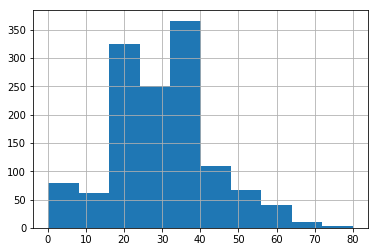

In [208]:
df.Age.hist()

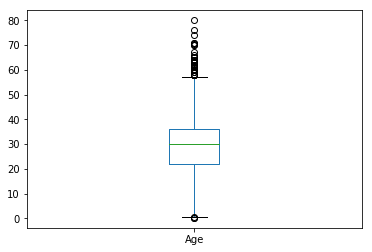

In [216]:
df.Age.plot(kind = "box")

In [217]:
Q1, Q3 = df.Age.quantile(.25), df.Age.quantile(.75)
Q1, Q3

(21.795235849056603, 36.0)

In [218]:
IQR = Q3-Q1

In [220]:
lth, uth  = Q1 - 1.5*IQR , Q3+ 1.5*IQR

In [223]:
df.loc[df.Age<lth, "Age"] = lth

In [224]:
df.loc[df.Age>uth, "Age"] = uth

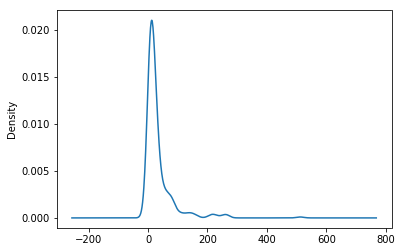

In [211]:
df.Fare.plot(kind = "kde")

In [212]:
df.Fare.skew()

4.370638496798939

In [213]:
df.Age.skew()

0.3742364130564997

In [229]:
df["Log_Fare"]=np.log(df.Fare + 1)

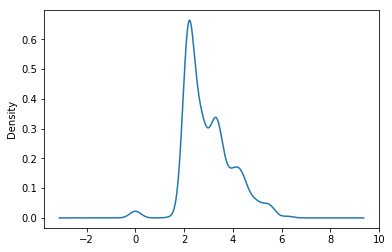

In [231]:
df["Log_Fare"].plot(kind = "kde")

In [233]:
df.Fare.quantile([.25, .5, .75, 1])

0.25      7.8958
0.50     14.4542
0.75     31.2750
1.00    512.3292
Name: Fare, dtype: float64

In [236]:
df["Fare_Discrete"]=pd.qcut(df.Fare, 4, labels = ["low", "med", "high", "v.high"])

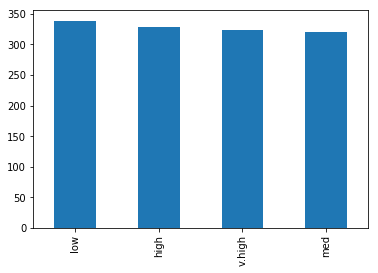

In [238]:
df.Fare_Discrete.value_counts().plot.bar()

----

### Factor columns to numerical
2 types: 
- ordinal columns : fare_discrete 
- nominal columns: Gender, Embarked, Cabin, title

In [239]:
df.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,Family,Adult,Log_Fare,Fare_Discrete
0,22.0,Z,S,7.2500,0,3,male,1,0,Mr,2,1,2.110213,low
1,38.0,C,C,71.2833,0,1,female,1,1,Mrs,2,1,4.280593,v.high
2,26.0,Z,S,7.9250,0,3,female,0,1,Miss,1,1,2.188856,med
3,35.0,C,S,53.1000,0,1,female,1,1,Mrs,2,1,3.990834,v.high
4,35.0,Z,S,8.0500,0,3,male,0,0,Mr,1,1,2.202765,med


In [241]:
df.Fare_Discrete = df.Fare_Discrete.cat.codes

In [242]:
df = pd.get_dummies(df, columns=["Cabin", "Embarked", "Sex", "Title"], drop_first=True)

In [244]:
df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Family',
       'Adult', 'Log_Fare', 'Fare_Discrete', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_Z', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Sir'],
      dtype='object')